In [2]:
import pandas as pd
import pycaret as pc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from lifetimes import BetaGeoFitter 
from lifetimes import GammaGammaFitter
from lifetimes.plotting import plot_frequency_recency_matrix
from lifetimes.plotting import plot_probability_alive_matrix
from lifetimes.plotting import plot_period_transactions
from lifetimes.utils import calibration_and_holdout_data 
from lifetimes.utils import summary_data_from_transaction_data
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases
from lifetimes.plotting import plot_history_alive


In [2]:
!pwd

/Users/0ill/Documents/mlops_works/notebooks


In [3]:
# Set the number of people and days
n_people = 2000
n_days = 210  # 3 months

# Create a date range
dates = pd.date_range('2024-01-01', periods=n_days)

# Generate random amounts
np.random.seed(0)
amounts = np.random.randint(1, 1000, size=(n_people*n_days))

# Create a dataframe with ID, Date, and Amount
start_data = pd.DataFrame({
    'ID': np.repeat(range(1, n_people+1), n_days),
    'Date': np.tile(dates, n_people),
    'Amount': amounts
})

# Randomly remove some transactions to simulate irregular buying behavior
start_data = start_data.sample(frac=0.90, random_state=0)
start_data = start_data.sample(frac=0.5, random_state=3000)
start_data = start_data.sample(frac=0.80, random_state=57)
start_data = start_data.sample(frac=0.6, random_state=534)

# Save the dataset to a CSV file
start_data.to_csv('../data/transactional_data.csv', index=False)
print(start_data.head(),start_data['Date'].max())

          ID       Date  Amount
94619    451 2024-04-29     150
120928   576 2024-06-27     702
186953   891 2024-02-23     619
139084   663 2024-03-05     654
229891  1095 2024-05-31     898 2024-07-28 00:00:00


In [5]:
!pwd

/Users/0ill/Documents/mlops_works/notebooks


In [359]:
start_data = pd.read_excel('../data/Adidas.xlsx',header=4,)
start_data.tail()

,Unnamed: 0,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
9643,NaN,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet
9644,NaN,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet
9645,NaN,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet
9646,NaN,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940.0,1234.80,0.42,Outlet
9647,NaN,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Women's Street Footwear,29.0,83,2407.0,649.89,0.27,Outlet


In [360]:
start_data['Invoice Date'].max()

Timestamp('2021-12-31 00:00:00')

In [361]:
data = summary_data_from_transaction_data(start_data, 'City', 'Invoice Date','Operating Profit', observation_period_end='2021-12-31',
                                            freq='W',)

In [362]:
data

,frequency,recency,T,monetary_value
City,,,,
Albany,11.0,47.0,50.0,811516.418182
Albuquerque,12.0,49.0,50.0,533072.403333
Anchorage,13.0,50.0,51.0,328139.205385
Atlanta,12.0,48.0,51.0,510424.076667
Baltimore,12.0,49.0,50.0,206725.539167
Billings,10.0,10.0,52.0,600532.200000
Birmingham,10.0,10.0,21.0,884712.035000
Boise,12.0,45.0,49.0,651707.042500
Boston,12.0,48.0,50.0,249512.375000


In [363]:
# Summary statistics
print(data.describe())


       frequency     recency           T  monetary_value
count  52.000000   52.000000   52.000000       52.000000
mean   11.846154   38.826923   54.038462   510719.807362
std     2.371271   18.385545   17.549886   226649.103503
min    10.000000   10.000000   20.000000   206725.539167
25%    11.000000   24.000000   49.000000   301034.405000
50%    12.000000   47.000000   50.000000   481911.987440
75%    12.000000   48.000000   51.000000   695963.022909
max    24.000000  104.000000  104.000000   983555.218000


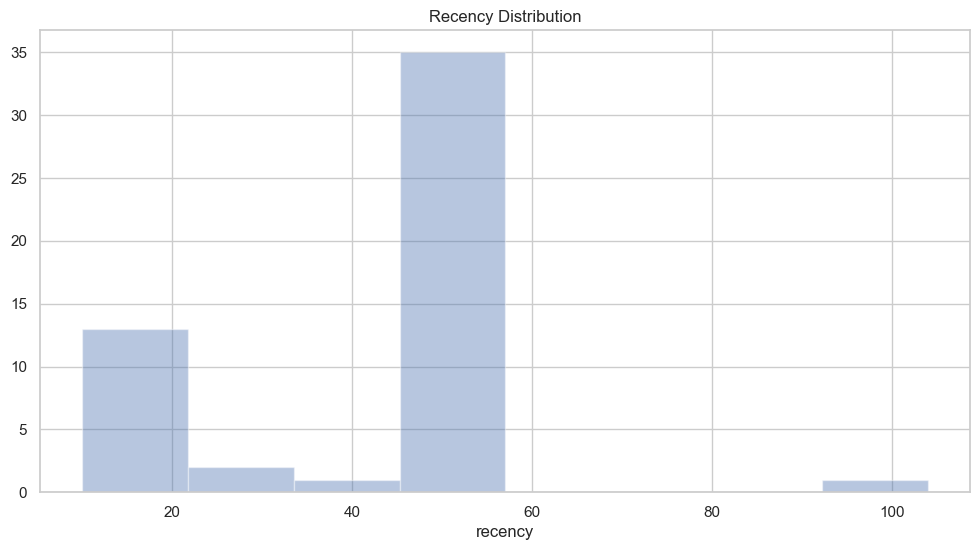

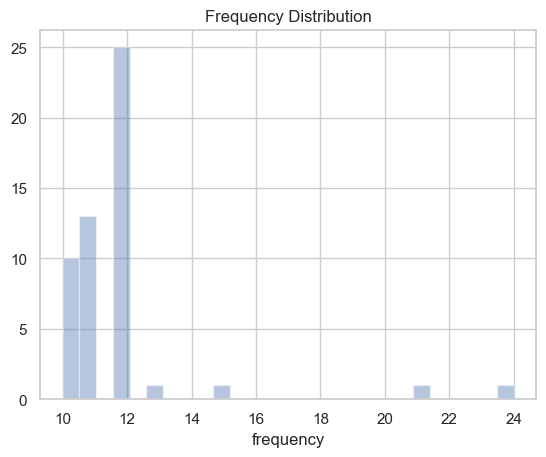

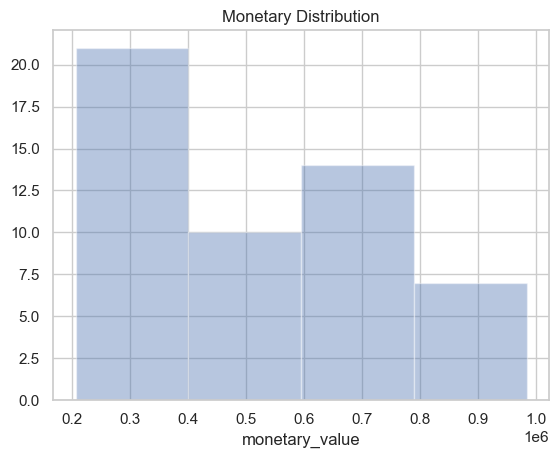

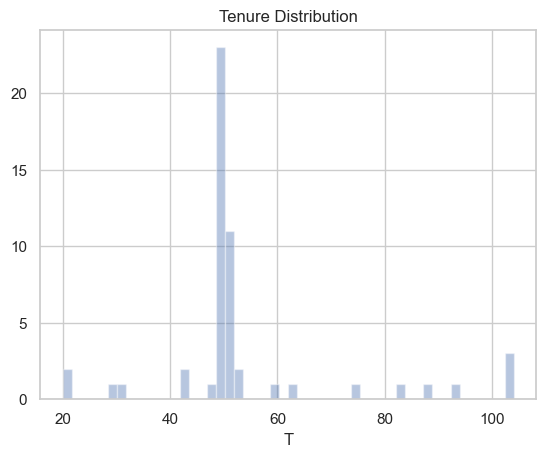

In [364]:
# Distribution plots
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))

sns.distplot(data['recency'], kde=False)
plt.title('Recency Distribution')
plt.show()

sns.distplot(data['frequency'], kde=False)
plt.title('Frequency Distribution')
plt.show()

sns.distplot(data['monetary_value'], kde=False)
plt.title('Monetary Distribution')
plt.show()

sns.distplot(data['T'], kde=False)
plt.title('Tenure Distribution')
plt.show()


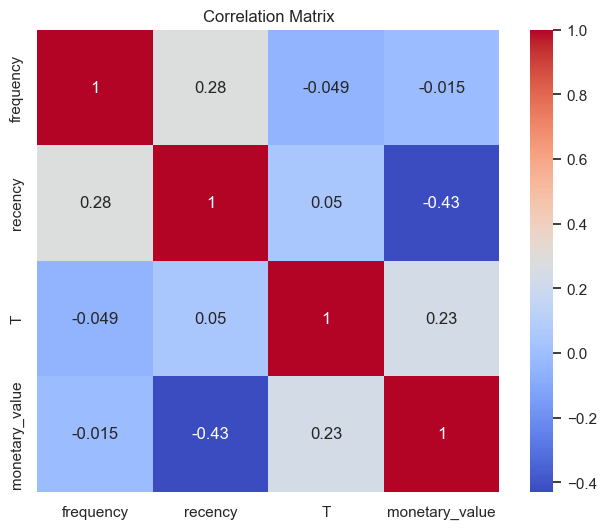

In [365]:
# Correlation heatmap
corr = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


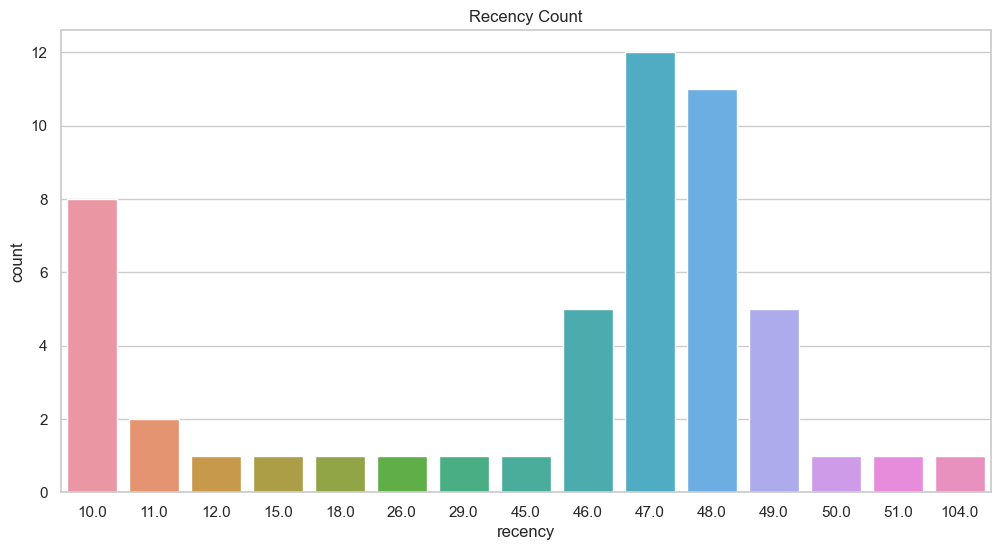

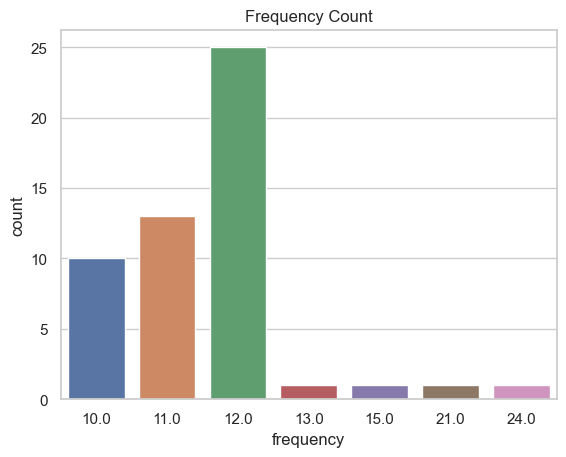

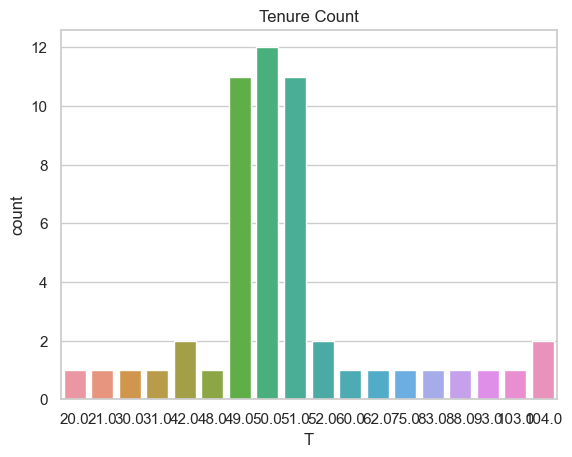

In [366]:
# Count plots
plt.figure(figsize=(12, 6))

sns.countplot(x=data['recency'])
plt.title('Recency Count')
plt.show()

sns.countplot(x=data['frequency'])
plt.title('Frequency Count')
plt.show()

sns.countplot(x=data['T'])
plt.title('Tenure Count')
plt.show()

In [367]:
data_f = data#[(data['Frequency'] > 0) & (data['Recency'] <= data['Tenure'])]

In [368]:
from lifetimes import BetaGeoFitter
from lifetimes.plotting import plot_frequency_recency_matrix
from lifetimes.plotting import plot_probability_alive_matrix
from lifetimes.plotting import plot_period_transactions
from lifetimes.utils import calibration_and_holdout_data
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases
from lifetimes.plotting import plot_history_alive

In [369]:
bgf = BetaGeoFitter(penalizer_coef=0.01)
bgf.fit(data_f['frequency'], data_f['recency'], data_f['T'])
print(bgf)

<lifetimes.BetaGeoFitter: fitted with 52 subjects, a: 0.15, alpha: 6.63, b: 2.25, r: 2.53>


Text(0.5, 0, 'City historical Frequency')

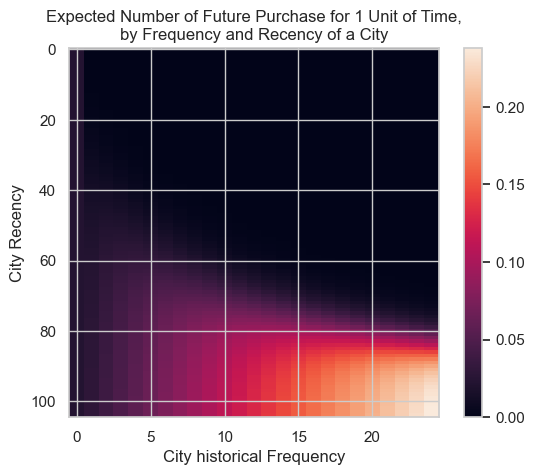

In [370]:
plot_frequency_recency_matrix(bgf)
plt.title('Expected Number of Future Purchase for 1 Unit of Time,\nby Frequency and Recency of a City')
plt.ylabel('City Recency')
plt.xlabel('City historical Frequency')

Text(0.5, 0, 'City historical Frequency')

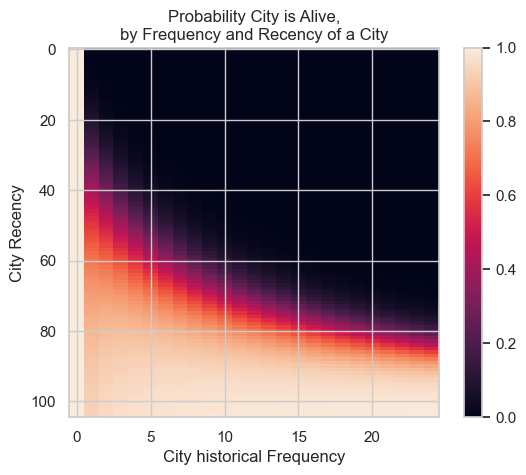

In [371]:
plot_probability_alive_matrix(bgf)
plt.title('Probability City is Alive,\nby Frequency and Recency of a City')
plt.ylabel('City Recency')
plt.xlabel('City historical Frequency')

In [396]:
t = 1
data['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, data_f['frequency'], data_f['recency'], data_f['T'])
data.sort_values(by='predicted_purchases').tail(5)

,frequency,recency,T,monetary_value,predicted_purchases
City,,,,,
Richmond,12.0,48.0,49.0,601095.690000,0.256997
Louisville,12.0,48.0,49.0,296950.713333,0.256997
Anchorage,13.0,50.0,51.0,328139.205385,0.265408
Portland,21.0,51.0,51.0,505781.122381,0.404982
Charleston,24.0,49.0,51.0,625112.039167,0.452792


<AxesSubplot: title={'center': 'Frequency of Repeat Transactions'}, xlabel='Number of Calibration Period Transactions', ylabel='Customers'>

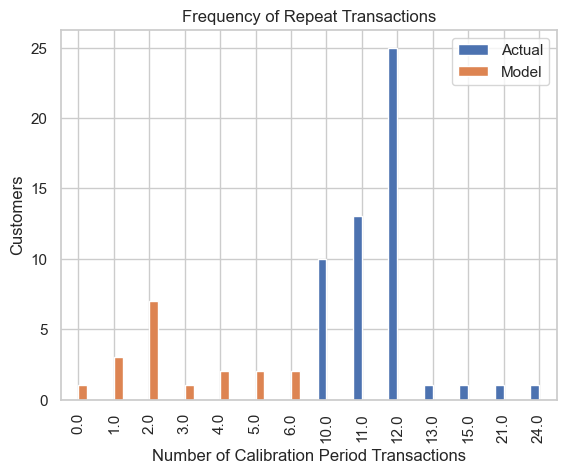

In [397]:
plot_period_transactions(bgf)

In [398]:
data_cal_holdout = calibration_and_holdout_data(start_data, 'City', 'Invoice Date',
                                        calibration_period_end='2021-06-01',
                                        observation_period_end='2021-12-31' ,freq='W')
print(data_cal_holdout.head())

             frequency_cal  recency_cal  T_cal  frequency_holdout  \
City                                                                
Albany                 4.0         16.0   20.0                7.0   
Albuquerque            5.0         19.0   20.0                7.0   
Anchorage              6.0         19.0   21.0                7.0   
Atlanta                5.0         18.0   21.0                7.0   
Baltimore              5.0         18.0   20.0                7.0   

             duration_holdout  
City                           
Albany                   30.0  
Albuquerque              30.0  
Anchorage                30.0  
Atlanta                  30.0  
Baltimore                30.0  


In [399]:
bgf.fit(data_cal_holdout['frequency_cal'], data_cal_holdout['recency_cal'], data_cal_holdout['T_cal'])
bgf.save_model('../models/bgf_small_size.pkl', save_data=False, save_generate_data_method=False)

<AxesSubplot: title={'center': 'Actual Purchases in Holdout Period vs Predicted Purchases'}, xlabel='Purchases in calibration period', ylabel='Average of Purchases in Holdout Period'>

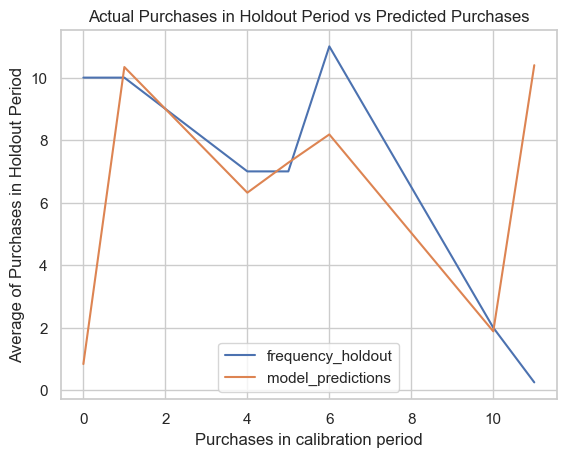

In [400]:
plot_calibration_purchases_vs_holdout_purchases(bgf, data_cal_holdout)

In [377]:
t = 10 #predict purchases in 10 periods
individual = data.iloc[2]
# The below function is an alias to `bfg.conditional_expected_number_of_purchases_up_to_time`
bgf.predict(t, individual['frequency'], individual['recency'], individual['T'])


2.5928165575686286

In [378]:
data_cal_holdout.index

Index(['Albany', 'Albuquerque', 'Anchorage', 'Atlanta', 'Baltimore',
       'Billings', 'Boise', 'Boston', 'Burlington', 'Charleston', 'Charlotte',
       'Cheyenne', 'Columbus', 'Denver', 'Des Moines', 'Detroit', 'Fargo',
       'Hartford', 'Honolulu', 'Houston', 'Indianapolis', 'Jackson',
       'Knoxville', 'Las Vegas', 'Little Rock', 'Los Angeles', 'Louisville',
       'Manchester', 'Miami', 'Milwaukee', 'Minneapolis', 'New Orleans',
       'New York', 'Newark', 'Oklahoma City', 'Omaha', 'Orlando',
       'Philadelphia', 'Phoenix', 'Portland', 'Providence', 'Richmond',
       'Salt Lake City', 'San Francisco', 'Seattle', 'Sioux Falls',
       'St. Louis', 'Wichita', 'Wilmington'],
      dtype='object', name='City')

<AxesSubplot: title={'center': 'History of P_alive'}, ylabel='P_alive'>

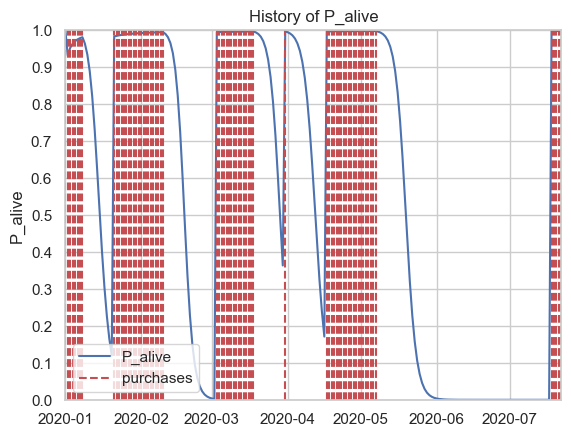

In [407]:
id = 'New York'
days_since_birth = 30
sp_trans = start_data.loc[start_data['City'] == id]
plot_history_alive(bgf, days_since_birth, sp_trans, 'Invoice Date')

In [380]:
data_returning = data[data.frequency > 0]


In [381]:
data_returning[['monetary_value', 'frequency']].corr()

,monetary_value,frequency
monetary_value,1.000000,-0.014673
frequency,-0.014673,1.000000


In [382]:
from lifetimes import GammaGammaFitter


In [383]:
ggf = GammaGammaFitter(penalizer_coef = 0.01)
ggf.fit(data_returning['frequency'],
        data_returning['monetary_value'])
print(ggf)
ggf.save_model('../models/ggf_small_size.pkl', save_data=False, save_generate_data_method=False)

<lifetimes.GammaGammaFitter: fitted with 52 subjects, p: 2.14, q: 0.09, v: 2.12>


In [384]:
print(ggf.conditional_expected_average_profit(
        data['frequency'],
        data['monetary_value']
    ).head(10))

City
Albany         844125.774562
Albuquerque    552642.461205
Anchorage      339227.883184
Atlanta        529162.681044
Baltimore      214314.922073
Billings       627183.811867
Birmingham     923975.439692
Boise          675632.353041
Boston         258672.525789
Burlington     469641.813041
dtype: float64


In [391]:
print("Expected conditional average profit: %s, Average profit: %s" % (
    ggf.conditional_expected_average_profit(
        data['frequency'],
        data['monetary_value']
    ).mean(),
    data[data['frequency']>0]['monetary_value'].mean()
))

Expected conditional average profit: 530324.7416177763, Average profit: 510719.8073623332


In [392]:

bgf.fit(data['frequency'], data['recency'], data['T'])


<lifetimes.BetaGeoFitter: fitted with 52 subjects, a: 0.15, alpha: 6.63, b: 2.25, r: 2.53>

In [387]:
print(ggf.customer_lifetime_value(
    bgf, #the model to use to predict the number of future purchases
    data['frequency'],
    data['recency'],
    data['T'],
    data['monetary_value'],
    time=2, # weekly
    discount_rate=0.00 # Weekly discount rate 
).tail(20))

City
Milwaukee         3.053059e+06
Minneapolis       3.904379e+00
New Orleans       1.092679e+07
New York          2.068954e+00
Newark            4.076004e+06
Oklahoma City     4.800236e+06
Omaha             1.158058e+04
Orlando           9.877331e+06
Philadelphia      2.585653e+06
Phoenix           6.416206e+06
Portland          1.180372e+07
Providence        3.497337e+06
Richmond          9.014252e+06
Salt Lake City    4.476728e+06
San Francisco     1.227761e+03
Seattle           2.926387e-01
Sioux Falls       3.353626e+06
St. Louis         4.444191e+06
Wichita           4.075756e+06
Wilmington        5.200145e+06
Name: clv, dtype: float64
